<!-- pipenv install pandas seaborn scikit-learn matplotlib scipy ipywidgets ipykernel optuna streamlit -->

In [112]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# ML
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Otimização
import optuna

# Carga dos dados

In [113]:
df = pd.read_csv('./dataset/laptops.csv')

In [114]:
df.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


# EDA

In [115]:
df.describe()

,index,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,77266.504541,63.931382,8.128153,12.191726,13.047427,610.938446,4.004036,15.171241,2003.503532,1181.227043
std,287.899458,57384.910269,10.190575,4.215499,5.585115,5.591188,266.927666,33.553936,0.938089,361.965292,263.884019
min,1.000000,9800.000000,24.000000,2.000000,0.000000,2.000000,32.000000,0.000000,10.100000,1080.000000,768.000000
25%,258.500000,43595.000000,58.000000,6.000000,8.000000,8.000000,512.000000,0.000000,14.000000,1920.000000,1080.000000
50%,507.000000,61900.000000,64.000000,8.000000,12.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1080.000000
75%,754.500000,89245.000000,71.000000,10.000000,16.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1200.000000
max,1002.000000,454490.000000,89.000000,24.000000,32.000000,36.000000,2048.000000,512.000000,18.000000,3840.000000,2560.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    object 
 2   Model                       991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    object 
 13  secondary_storage_capacity  991 non

In [117]:
# Checagem variável year_of_warranty

df['year_of_warranty'].unique()

array(['1', '2', 'No information', '3'], dtype=object)

In [118]:
# Tranformação de tipo e valor
df['year_of_warranty'].replace(['No information'],['1'], inplace=True)
df['is_touch_screen'].replace([True, False],[1, 0], inplace=True)
df['year_of_warranty'] = df['year_of_warranty'].astype(int)

C:\Users\55119\AppData\Local\Temp\ipykernel_15412\1280482588.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\55119\AppData\Local\Temp\ipykernel_15412\1280482588.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

## Análise univariada

### Variáveis categóricas

In [119]:
# Distribuição da variável brand
percen_brand = df.value_counts('brand')/len(df)*100
px.bar(percen_brand, color=percen_brand.index)

In [120]:
# Distribuição da variável brand
percen_processor_brand = df.value_counts('processor_brand')/len(df)*100
px.bar(percen_processor_brand, color=percen_processor_brand.index)

### Variáveis numéricas

In [121]:
df_numerico = df.select_dtypes('int').iloc[:, 1:7].merge(df.select_dtypes('int').iloc[:, 9:11], left_index=True, right_index=True)


In [122]:
import plotly.graph_objects as go
import plotly.subplots as sp

fig = sp.make_subplots(rows=1, cols=len(df_numerico.columns), subplot_titles=df_numerico.columns)

for i, col in enumerate(df_numerico.columns, start=1):
    fig.add_trace(
        go.Histogram(x=df_numerico[col], name=col, opacity=0.75),
        row=1, col=i
    )

fig.update_layout(
    height=400,
    width=500 * len(df_numerico.columns),
    showlegend=False,
    title_text="Histograms with Scroll",
    xaxis=dict(title="Values"),
    yaxis=dict(title="Count"),
)

# Exibir a figura
fig.show()

In [123]:
# Distribuição por Brand e price

px.box(df, x='brand', y="Price", color='brand')

In [124]:
# Distribuição por Brand e rating

px.box(df, x='brand', y="Rating", color='brand')

In [125]:
px.scatter(df, x='Price', y='Rating', color='brand')

# Treinamento do modelo clusterig hierarquico

In [126]:
# Colunas para clusterização

X = df.copy()

# Remoção de colunas desnecessárias para a clusterização
X.drop(columns=['index', 'Model'], inplace=True)

categoricas = list(X.select_dtypes(object).columns)
numericas = list(X.select_dtypes(int).drop(columns=['is_touch_screen']).columns)

In [127]:
trans_categoricas = OneHotEncoder()
trans_numericas = StandardScaler()

tranformador = ColumnTransformer(transformers=[
    ('num', trans_numericas, numericas),
    ('cat', trans_categoricas, categoricas)
])

In [128]:
X_tranformado = tranformador.fit_transform(X)

In [129]:
X_tranformado

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 17838 stored elements and shape (991, 74)>

In [130]:
def hierarquico_aglomerativo(trial):
    #hiperparâmetros a serem ajustados
    n_cluster = trial.suggest_int('n_clusters', 40, 150)
    # Linkage = critério de distãncia entre dois conjuntos para formar o cluster
    # Ward = variança
    # Average = média
    # Complete = Máxima
    # Single = Mínima 
    linkage = trial.suggest_categorical('linkage', ['ward', 'average', 'complete', 'single'])

    #Intanciar modelo
    modelo_hierarquico = AgglomerativeClustering(linkage=linkage, n_clusters=n_cluster)
    
    y = modelo_hierarquico.fit_predict(X_tranformado.toarray())

    # Calculo do silhouete Score
    silhouette_avg = silhouette_score(X_tranformado, y)

    return silhouette_avg

In [131]:
espaco_busca_ag = {'n_clusters': range(10, 151), 'linkage':['ward', 'average', 'complete', 'single']}
sampler_ag = optuna.samplers.GridSampler(search_space=espaco_busca_ag)
estudo_ag = optuna.create_study(direction='maximize', sampler = sampler_ag)

[I 2024-12-23 14:48:27,525] A new study created in memory with name: no-name-cbe5ff3f-a4b6-405a-a24c-979f9da73afd


In [132]:
# Estudo do optuna para o cluster aglomeratico

estudo_ag.optimize(hierarquico_aglomerativo, n_trials=600)

[I 2024-12-23 14:48:27,920] Trial 0 finished with value: 0.2280411596305643 and parameters: {'n_clusters': 108, 'linkage': 'average'}. Best is trial 0 with value: 0.2280411596305643.
[I 2024-12-23 14:48:28,112] Trial 1 finished with value: 0.17099856178228048 and parameters: {'n_clusters': 44, 'linkage': 'complete'}. Best is trial 0 with value: 0.2280411596305643.
[I 2024-12-23 14:48:28,318] Trial 2 finished with value: 0.19752010728960967 and parameters: {'n_clusters': 57, 'linkage': 'average'}. Best is trial 0 with value: 0.2280411596305643.
[I 2024-12-23 14:48:28,516] Trial 3 finished with value: 0.20336842247499945 and parameters: {'n_clusters': 46, 'linkage': 'complete'}. Best is trial 0 with value: 0.2280411596305643.
[I 2024-12-23 14:48:28,873] Trial 4 finished with value: 0.24626016799112532 and parameters: {'n_clusters': 140, 'linkage': 'complete'}. Best is trial 4 with value: 0.24626016799112532.
[I 2024-12-23 14:48:29,216] Trial 5 finished with value: 0.24716270020385148 and

In [133]:
# Melhor config optuna

best_params = estudo_ag.best_params
best_params


{'n_clusters': 150, 'linkage': 'ward'}

In [134]:
def hierarquico_divisivo(trial):
    #hiperparâmetros a serem ajustados
    n_cluster = trial.suggest_int('n_clusters', 40, 150)

    #Intanciar modelo
    modelo_hierarquico = BisectingKMeans(n_clusters=n_cluster)
    
    y = modelo_hierarquico.fit_predict(X_tranformado.toarray())

    # Calculo do silhouete Score
    silhouette_avg = silhouette_score(X_tranformado, y)

    return silhouette_avg

In [135]:
espaco_busca_di = {'n_clusters': range(10, 151)}
sampler_di = optuna.samplers.GridSampler(search_space=espaco_busca_di)
estudo_di = optuna.create_study(direction='maximize', sampler = sampler_di)

[I 2024-12-23 14:54:53,204] A new study created in memory with name: no-name-358a9c78-d17d-47fe-a374-d4d02cc9e137


In [136]:
estudo_di.optimize(hierarquico_divisivo, n_trials=200)

[I 2024-12-23 14:54:56,640] Trial 0 finished with value: 0.16521964540687886 and parameters: {'n_clusters': 55}. Best is trial 0 with value: 0.16521964540687886.
[I 2024-12-23 14:54:57,463] Trial 1 finished with value: 0.1623262918620394 and parameters: {'n_clusters': 70}. Best is trial 0 with value: 0.16521964540687886.
c:\Users\55119\.virtualenvs\clusterHierarquico-ZZKnKYkM\Lib\site-packages\optuna\samplers\_grid.py:199: UserWarning:

The value `17` is out of range of the parameter `n_clusters`. The value will be used but the actual distribution is: `IntDistribution(high=150, log=False, low=40, step=1)`.

[I 2024-12-23 14:54:57,793] Trial 2 finished with value: 0.1724891350100973 and parameters: {'n_clusters': 17}. Best is trial 2 with value: 0.1724891350100973.
[I 2024-12-23 14:54:58,512] Trial 3 finished with value: 0.18447948928004002 and parameters: {'n_clusters': 61}. Best is trial 3 with value: 0.18447948928004002.
[I 2024-12-23 14:54:59,709] Trial 4 finished with value: 0.2016

In [137]:
# Melhor config optuna

best_params_di = estudo_di.best_params
best_params_di

{'n_clusters': 140}

In [138]:
# Modelo com melhor configuração

best_model = AgglomerativeClustering(
    n_clusters=best_params['n_clusters'],
    linkage=best_params['linkage']
)

In [139]:
# Treinar modelo

best_model.fit(X_tranformado.toarray())

AgglomerativeClustering(n_clusters=150)

In [140]:
# Coluna com cluster escolhido no dataframe original

df['cluster'] = best_model.labels_

In [141]:
df

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,cluster
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,0,intel,integrated,0,15.6,1920,1080,windows,1,28
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,0,intel,integrated,0,15.6,1920,1080,windows,1,82
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,0,amd,dedicated,0,15.6,1920,1080,windows,1,58
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,0,intel,integrated,0,14.0,1920,1080,windows,1,14
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,0,amd,integrated,0,15.6,1920,1080,windows,1,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990,68,amd,ryzen 5,6,12,16,...,0,nvidia,dedicated,0,15.6,1920,1080,windows,1,3
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990,73,intel,core i7,10,16,16,...,0,nvidia,dedicated,0,15.6,1920,1080,windows,2,78
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990,59,amd,ryzen 5,4,8,8,...,0,amd,integrated,0,15.6,1920,1080,windows,1,65
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990,68,amd,ryzen 5,6,12,16,...,0,amd,integrated,0,14.0,2560,1600,windows,1,107


### Visualização dos resultados

In [ ]:
# Mostrar Chart com Trials do Optuna

fig = optuna.visualization.plot_optmizationn_history(estudo_ag)
fig.show()

In [142]:
# Modelo com scipy

modelo_de = linkage(X_tranformado.toarray(), method=best_params['linkage'], optimal_ordering=True)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [40.0, 40.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [47.5, 47.5, 70.0, 70.0],
  [58.75, 58.75, 85.0, 85.0],
  [12.5, 12.5, 71.875, 71.875],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [120.0, 120.0, 135.0, 135.0],
  [100.0, 100.0, 127.5, 127.5],
  [145.0, 145.0, 155.0, 155.0],
  [113.75, 113.75, 150.0, 150.0],
  [42.1875, 42.1875, 131.875, 131.875],
  [165.0, 165.0, 175.0, 175.0],
  [170.0, 170.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [200.0, 200.0, 215.0, 215.0],
  [177.5, 177.5, 207.5, 207.5],
  [235.0, 235.0, 245.0, 245.0],
  [240.0, 240.0, 255.0, 255.0],
  [225.0, 225.0, 247.5, 247.5],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [236.25, 236.25, 272.5, 272.5],
  [192.5, 192.5, 254.375, 254.375],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [320.0, 320.0, 335.0, 335.0],
  [300.0, 300.0, 327.5, 327.5],
  [345.0, 34

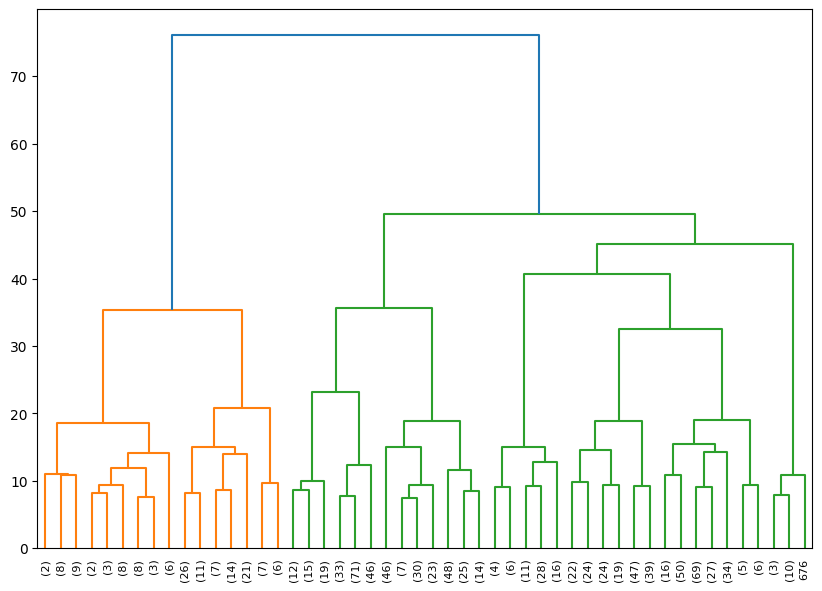

In [144]:
plt.figure(figsize=(10,7))

dendrogram(modelo_de, truncate_mode='lastp', p=50)

In [145]:
px.scatter(df, x='brand', y='Price', color='cluster')

# Salvar modelo

In [146]:
import joblib

joblib.dump(best_model, './modelo_clusterização.pkl')

joblib.dump(tranformador, './modelo_preprocessor.pkl')


['./modelo_preprocessor.pkl']